In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/kaggle/input/resouces/Fdata.csv')
df.columns=df.columns.str.strip()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [3]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [4]:
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head())

   Classes
43     NaN


In [5]:
df=df.drop(43)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [6]:
df[['DC','FWI']]=df[['DC', 'FWI']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          121 non-null    int64  
 1   month        121 non-null    int64  
 2   year         121 non-null    int64  
 3   Temperature  121 non-null    int64  
 4   RH           121 non-null    int64  
 5   Ws           121 non-null    int64  
 6   Rain         121 non-null    float64
 7   FFMC         121 non-null    float64
 8   DMC          121 non-null    float64
 9   DC           121 non-null    float64
 10  ISI          121 non-null    float64
 11  BUI          121 non-null    float64
 12  FWI          121 non-null    float64
 13  Classes      121 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 14.2+ KB


In [7]:
df.drop(['day','month','year'],axis=1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [8]:
df.columns=df.columns.str.strip()
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

In [9]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [10]:
## independent and dependent feature
x=df.drop('FWI',axis=1)
y=df['FWI']

In [11]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0
...,...,...,...,...,...,...,...,...,...,...
117,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1
118,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0
119,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0
120,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0


In [12]:
y

0      0.2
1      0.2
2      0.1
3      1.0
4      0.9
      ... 
117    6.5
118    0.0
119    0.2
120    0.7
121    0.5
Name: FWI, Length: 121, dtype: float64

In [13]:
## Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [14]:
x_train.shape,x_test.shape

((90, 10), (31, 10))

In [15]:
## Feature selection based on correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.516221,-0.148683,-0.135914,0.587525,0.404227,0.331249,0.529565,0.391978,0.519822
RH,-0.516221,1.000000,0.014511,0.195940,-0.673630,-0.369996,-0.274098,-0.701824,-0.356503,-0.466919
Ws,-0.148683,0.014511,1.000000,-0.139414,0.098500,0.089629,0.069449,0.199996,0.087771,0.099408
Rain,-0.135914,0.195940,-0.139414,1.000000,-0.532790,-0.344343,-0.349494,-0.419341,-0.354044,-0.463739
FFMC,0.587525,-0.673630,0.098500,-0.532790,1.000000,0.570826,0.491637,0.767946,0.570128,0.800153
DMC,0.404227,-0.369996,0.089629,-0.344343,0.570826,1.000000,0.919766,0.652202,0.992267,0.532455
DC,0.331249,-0.274098,0.069449,-0.349494,0.491637,0.919766,1.000000,0.511397,0.941726,0.483847
ISI,0.529565,-0.701824,0.199996,-0.419341,0.767946,0.652202,0.511397,1.000000,0.640169,0.704340
BUI,0.391978,-0.356503,0.087771,-0.354044,0.570128,0.992267,0.941726,0.640169,1.000000,0.551610
Classes,0.519822,-0.466919,0.099408,-0.463739,0.800153,0.532455,0.483847,0.704340,0.551610,1.000000


<Axes: >

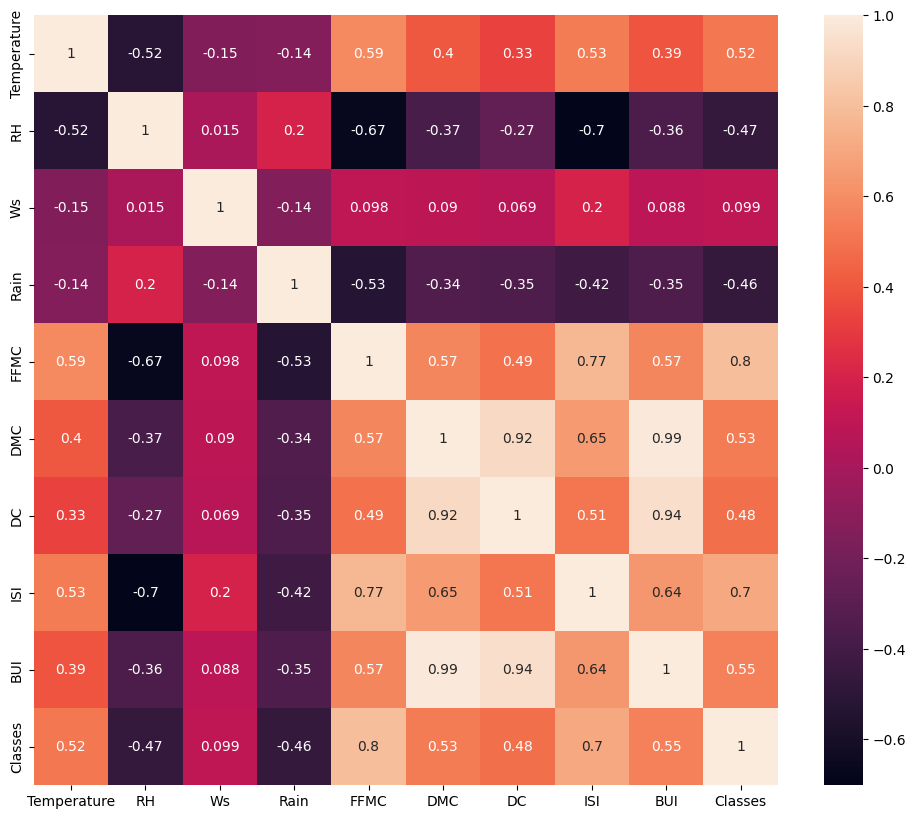

In [16]:
## check for multicollinearity
plt.figure(figsize=(12,10))
sns.heatmap(x_train.corr(),annot=True)

In [17]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            if abs (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
                return col_corr

In [18]:
corr_features=correlation(x_train,0.80)

In [19]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((90, 9), (31, 9))

In [20]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [21]:
x_train_scaled

array([[ 5.06707457e-01,  7.40348753e-01,  8.82538005e-02,
        -4.01598497e-01,  1.42969707e-01,  1.05763421e+00,
        -5.15780835e-01,  1.13215421e+00,  7.42781353e-01],
       [-5.28467900e-02,  2.59007458e-01,  5.06298119e-01,
         3.61299686e-02, -5.57234044e-01, -7.41783170e-01,
        -8.86271294e-01, -7.79974360e-01, -1.34629120e+00],
       [-6.12401037e-01,  4.65296584e-01,  8.82538005e-02,
        -4.64131135e-01,  1.92395854e-01, -8.25802658e-01,
        -4.06813053e-01, -7.99892366e-01,  7.42781353e-01],
       [-5.28467900e-02,  1.21481374e-01,  5.06298119e-01,
        -4.64131135e-01,  5.38378884e-01, -1.32641878e-01,
         2.25200083e-01, -1.82434181e-01,  7.42781353e-01],
       [ 5.06707457e-01, -1.46006859e+00,  9.24342437e-01,
        -4.64131135e-01,  9.25550370e-01,  4.20486422e-01,
         1.77254259e+00,  7.27154759e-01,  7.42781353e-01],
       [-1.45173241e+00,  1.90244416e-01,  1.34238676e+00,
         9.11586899e-01, -1.42219162e+00, -1.007844

/tmp/ipykernel_13/2424332088.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x train after scalling')

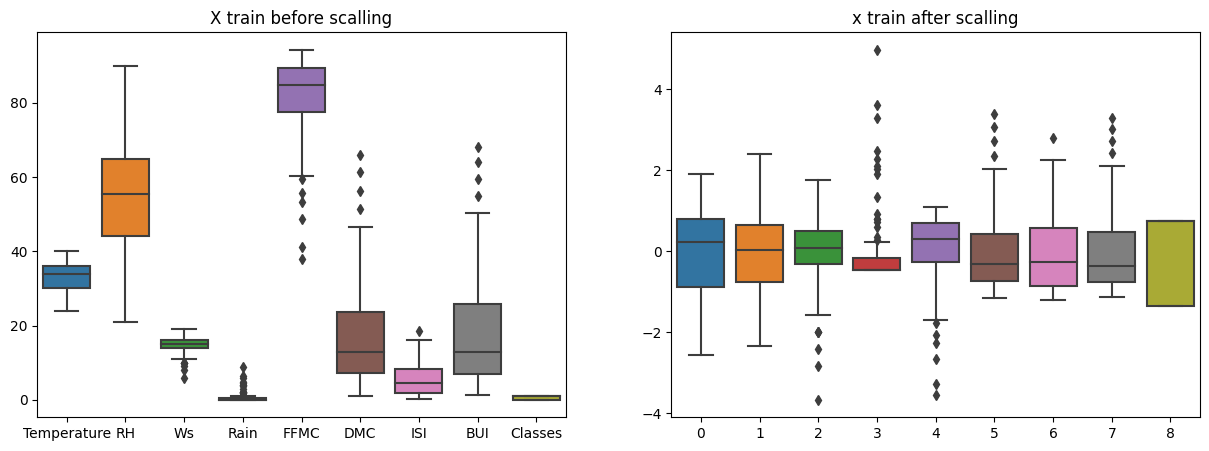

In [22]:
## box plot
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('X train before scalling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x train after scalling')

51.998477670700574
-89.49000687029748


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


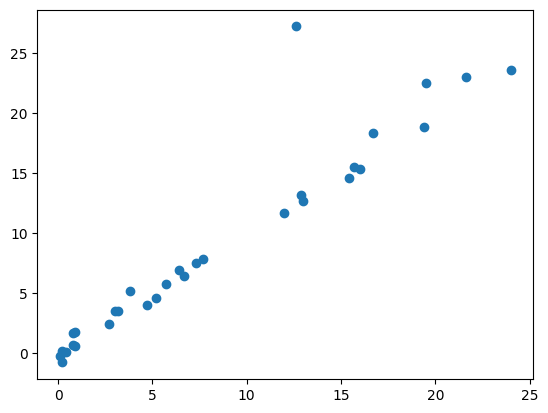

In [23]:
## Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
mae=mean_absolute_error(y_test,linreg.predict(x_test))
score=r2_score(y_test,linreg.predict(x_test))
print(mae)
print(score)
plt.scatter(y_test,linreg.predict(x_test_scaled))

81.76357449276301
-89.49000687029748


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


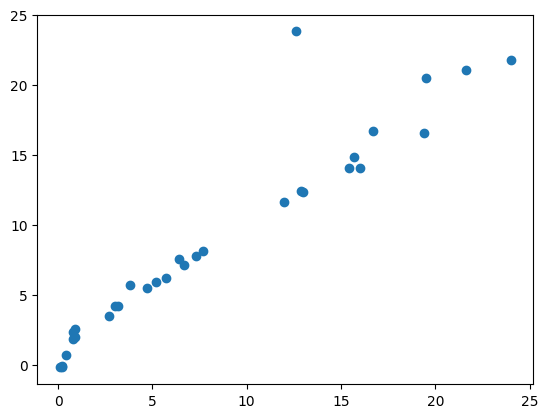

In [24]:
## Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
mae=mean_absolute_error(y_test,lasso.predict(x_test))
score=r2_score(y_test,linreg.predict(x_test))
print(mae)
print(score)
plt.scatter(y_test,lasso.predict(x_test_scaled))

In [25]:
## Cross validation
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)


LassoCV(cv=5)

In [26]:
lassocv.predict(x_test_scaled)

array([ 7.44235722e+00,  1.26587859e+01,  6.25603012e-01,  3.38435320e+00,
        1.16475815e+01,  2.69989339e+01,  1.54895170e+01,  1.82357290e+01,
        6.97598231e-01,  1.46380980e+01,  1.13568071e-02,  2.23700025e+01,
        1.31534099e+01,  4.76024871e+00,  1.86119864e+01,  3.64093327e-02,
        5.16343223e+00, -7.99259912e-01,  1.52236662e+01,  5.70877209e+00,
        1.69428792e+00,  7.81917230e+00,  6.94428491e+00,  2.28966530e+01,
        4.17078209e+00,  1.74953170e+00, -2.94609470e-01,  3.44211899e+00,
        2.35191092e+01,  2.42781357e+00,  6.43251020e+00])

In [27]:
lassocv.alphas_

array([7.87941996, 7.34837343, 6.85311765, 6.39124046, 5.96049224,
       5.55877501, 5.18413218, 4.83473902, 4.5088938 , 4.20500944,
       3.92160588, 3.65730277, 3.4108128 , 3.18093544, 2.96655103,
       2.76661542, 2.5801548 , 2.406261  , 2.24408707, 2.09284311,
       1.95179249, 1.82024821, 1.69756957, 1.58315906, 1.47645944,
       1.37695102, 1.28414913, 1.19760177, 1.11688742, 1.04161295,
       0.97141172, 0.90594182, 0.84488438, 0.787942  , 0.73483734,
       0.68531177, 0.63912405, 0.59604922, 0.5558775 , 0.51841322,
       0.4834739 , 0.45088938, 0.42050094, 0.39216059, 0.36573028,
       0.34108128, 0.31809354, 0.2966551 , 0.27666154, 0.25801548,
       0.2406261 , 0.22440871, 0.20928431, 0.19517925, 0.18202482,
       0.16975696, 0.15831591, 0.14764594, 0.1376951 , 0.12841491,
       0.11976018, 0.11168874, 0.10416129, 0.09714117, 0.09059418,
       0.08448844, 0.0787942 , 0.07348373, 0.06853118, 0.0639124 ,
       0.05960492, 0.05558775, 0.05184132, 0.04834739, 0.04508

In [28]:
lassocv.mse_path_

array([[54.04415834, 89.06620563, 94.47851852, 39.06223735, 67.70119776],
       [48.35630181, 89.06620563, 93.42309125, 34.05830006, 60.48570717],
       [43.38431165, 81.00900138, 83.62516564, 29.72152725, 54.24069075],
       [39.03662927, 70.59617505, 75.06260229, 25.94977102, 48.8376776 ],
       [34.61177552, 61.53495019, 67.57724566, 22.66937684, 44.16506952],
       [30.30513962, 53.64972801, 61.03135467, 19.81636242, 40.1259339 ],
       [26.55535054, 46.78753872, 55.30495621, 17.3350919 , 36.63608481],
       [23.28990697, 40.81540253, 48.67424841, 15.17706253, 32.98763806],
       [20.44599652, 35.61750265, 42.72200641, 13.30020394, 28.61828154],
       [17.96896978, 31.09350761, 37.53199288, 11.66788762, 24.83069284],
       [15.81127827, 27.15052112, 33.00583334, 10.24825634, 21.54836545],
       [13.93120864, 23.71099861, 29.05781815,  9.01360266, 18.70443765],
       [12.29349333, 20.71757531, 25.6134069 ,  7.93982839, 16.2411338 ],
       [10.86641557, 18.11226856, 22.6

49.89756718950184
-82.84262254433858


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


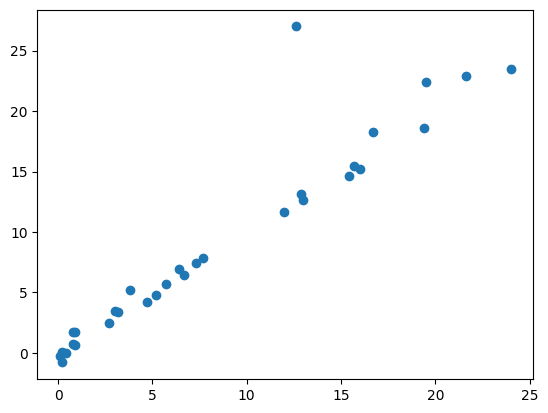

In [29]:
plt.scatter(y_test,lassocv.predict(x_test_scaled))
mae=mean_absolute_error(y_test,lassocv.predict(x_test))
score=r2_score(y_test,lassocv.predict(x_test))
print(mae)
print(score)

49.387810276590606
-79.85305789954951


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


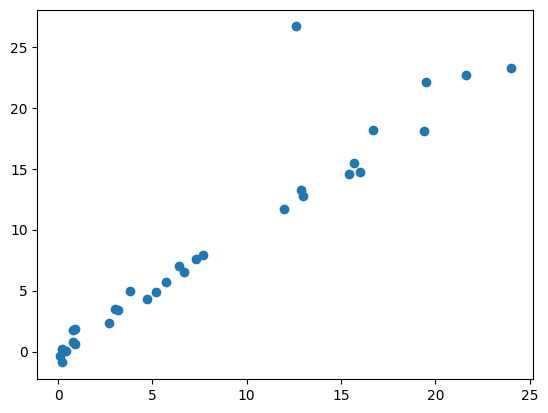

In [30]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
mae=mean_absolute_error(y_test,ridge.predict(x_test))
score=r2_score(y_test,ridge.predict(x_test))
print(mae)
print(score)
plt.scatter(y_test,ridge.predict(x_test_scaled))

1.0702284235138246
0.854942814820771


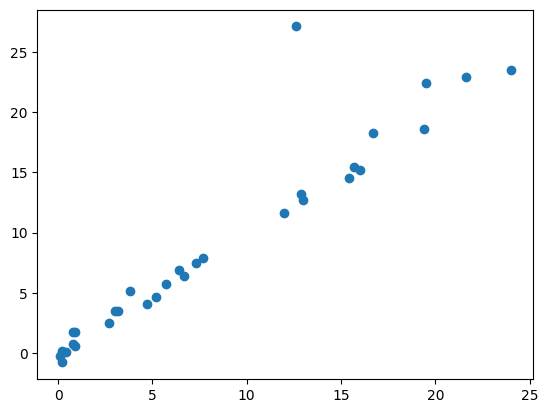

In [31]:
## Ridge cv
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV()
ridgecv.fit(x_train_scaled,y_train)
mae=mean_absolute_error(y_test,ridgecv.predict(x_test_scaled))
score=r2_score(y_test,ridgecv.predict(x_test_scaled))
print(mae)
print(score)
plt.scatter(y_test,ridgecv.predict(x_test_scaled))

In [32]:
ridgecv.alphas

(0.1, 1.0, 10.0)

76.13260723465802
-148.3314465712443


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


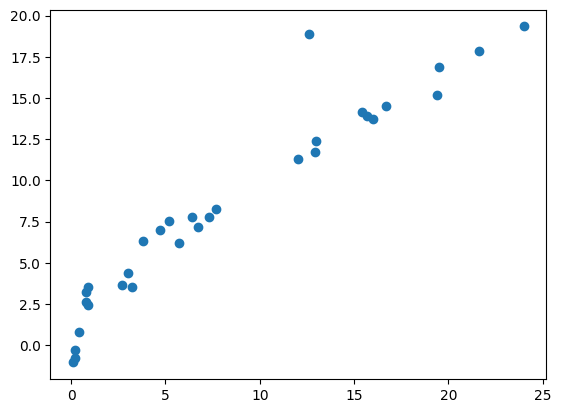

In [33]:
## Elasticnet
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
elas=ElasticNet()
elas.fit(x_train_scaled,y_train)
mae=mean_absolute_error(y_test,elas.predict(x_test))
score=r2_score(y_test,elas.predict(x_test))
print(mae)
print(score)
plt.scatter(y_test,elas.predict(x_test_scaled))

1.068313737400766
0.8622906786709317


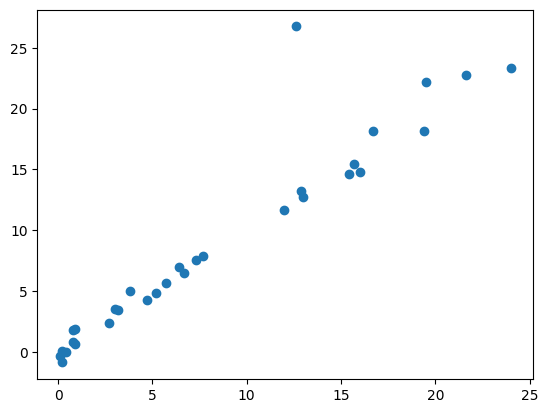

In [34]:
## ElasticNet
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled,y_train)
mae=mean_absolute_error(y_test,elasticcv.predict(x_test_scaled))
score=r2_score(y_test,elasticcv.predict(x_test_scaled))
print(mae)
print(score)
plt.scatter(y_test,elasticcv.predict(x_test_scaled))

In [35]:
elasticcv.alphas_

array([15.75883992, 14.69674685, 13.7062353 , 12.78248092, 11.92098448,
       11.11755003, 10.36826436,  9.66947805,  9.01778759,  8.41001889,
        7.84321176,  7.31460554,  6.82162561,  6.36187087,  5.93310207,
        5.53323085,  5.16030961,  4.81252201,  4.48817413,  4.18568622,
        3.90358498,  3.64049641,  3.39513914,  3.16631812,  2.95291888,
        2.75390203,  2.56829825,  2.39520354,  2.23377484,  2.08322589,
        1.94282344,  1.81188364,  1.68976875,  1.57588399,  1.46967469,
        1.37062353,  1.27824809,  1.19209845,  1.111755  ,  1.03682644,
        0.9669478 ,  0.90177876,  0.84100189,  0.78432118,  0.73146055,
        0.68216256,  0.63618709,  0.59331021,  0.55332308,  0.51603096,
        0.4812522 ,  0.44881741,  0.41856862,  0.3903585 ,  0.36404964,
        0.33951391,  0.31663181,  0.29529189,  0.2753902 ,  0.25682983,
        0.23952035,  0.22337748,  0.20832259,  0.19428234,  0.18118836,
        0.16897688,  0.1575884 ,  0.14696747,  0.13706235,  0.12

In [36]:
elasticcv.alpha_

0.015758839919018962